In [231]:
# Import packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn import decomposition
from collections import Counter
from parse import preprocess

In [232]:
# Function to show classification report for Cross Validation
def classification_report_with_accuracy_score(y_true, y_pred):
    print(classification_report(y_true, y_pred)) # print classification report
    return accuracy_score(y_true, y_pred) # return accuracy score

In [233]:
# Pre-parse the dataset
# data = preprocess("rawfile_blood.csv")
data = pd.read_csv("rawfile_blood_parsed_encoded.csv")

In [234]:
data.columns

Index(['mtag', 'condition', 'A1_1', 'A2_1', 'A3_1', 'B1_a', 'B1_a1', 'B1_a2',
       'B1_a3', 'B1_a4', 'B1_a5', 'B1_a6', 'B1_b', 'B1_b1', 'B1_b2', 'B1_b3',
       'B1_c', 'B1_d', 'B2_a1', 'B2_a2', 'B2_a3', 'B2_a4', 'B2_a5', 'B2_b1',
       'B2_b2', 'B2_b3', 'B2_c1', 'B2_c2', 'B2_c4', 'B2_c5', 'B2_c6', 'B2_c7',
       'B2_d1', 'B2_d2', 'B2_d3', 'B2_d4', 'B2_d5', 'B2_d6', 'B2_d7', 'B2_d8',
       'B2_d9', 'B3', 'B4_a2', 'B4_a5', 'B5_a2', 'B5_a3', 'B6'],
      dtype='object')

In [235]:
c = data['condition'].value_counts()
condition = c.index
c

robust          343
prefrail_mci    233
prefrail        223
mci             133
frail_mci        76
frail             7
Name: condition, dtype: int64

In [236]:
# for i in range(0, len(data)):
# 	if data.at[i, 'condition'] == 'frail':
# 		data.at[i, 'condition'] = 'non-robust'
# 	elif data.at[i, 'condition'] == 'frail_mci':
# 		data.at[i, 'condition'] = 'non-robust'
# 	elif data.at[i, 'condition'] == 'mci':
# 		data.at[i, 'condition'] = 'non-robust'
# 	elif data.at[i, 'condition'] == 'prefrail_mci':
# 		data.at[i, 'condition'] = 'non-robust'
# 	elif data.at[i, 'condition'] == 'prefrail':
# 		data.at[i, 'condition'] = 'non-robust'
# 	elif data.at[i, 'condition'] == 'robust':
# 		data.at[i, 'condition'] = 'robust'

# df1 = data[data.condition != 'frail']
# df1 = df1.reset_index(drop=True)

# df2 = data[data.condition == 'robust']
# df2 = df2.reset_index(drop=True)

# df = data

for i in range(0, len(data)):
	if data.at[i, 'condition'] == 'frail_mci':
		data.at[i, 'condition'] = 'frail'

df1 = data[data.condition == 'robust']
df1 = df1.reset_index(drop=True)

df2 = data[data.condition == 'frail']
df2 = df2.reset_index(drop=True)

data = pd.concat([df1, df2], ignore_index=True)

df = data

c = df['condition'].value_counts()
condition = c.index
c

# data = pd.concat([df1, df2], ignore_index=True)

robust    343
frail      83
Name: condition, dtype: int64

In [237]:
for i in range(len(condition)):
    df['condition'].replace(condition[i], i, inplace = True)

In [238]:
y = df['condition']

# features = ['A1_1', 'A2_1', 'A3_1', 'B1_a', 'B1_a1', 'B1_a2',
#        'B1_a3', 'B1_a4', 'B1_a5', 'B1_a6', 'B1_b', 'B1_b1', 'B1_b2', 'B1_b3',
#        'B1_c', 'B1_d', 'B2_a1', 'B2_a2', 'B2_a3', 'B2_a4', 'B2_a5', 'B2_b1',
#        'B2_b2', 'B2_b3', 'B2_c1', 'B2_c2', 'B2_c4', 'B2_c5', 'B2_c6', 'B2_c7',
#        'B2_d1', 'B2_d2', 'B2_d3', 'B2_d4', 'B2_d5', 'B2_d6', 'B2_d7', 'B2_d8',
#        'B2_d9', 'B3', 'B4_a2', 'B4_a5', 'B5_a2', 'B5_a3', 'B6']

# features = ['A1_1', 'A2_1', 'A3_1', 'B1_a', 'B1_a1', 'B1_a2',
#        'B1_a3', 'B1_a4', 'B1_a5', 'B1_a6', 'B1_b', 'B1_b1', 'B1_b2', 'B1_b3',
#        'B1_c', 'B1_d', 'B2_a1', 'B2_a2', 'B2_a3', 'B2_a4', 'B2_a5', 'B2_b1',
#        'B2_b2', 'B2_b3', 'B2_c1', 'B2_c2', 'B2_c4', 'B2_c5', 'B2_c6', 'B2_c7',
#        'B2_d1', 'B2_d2', 'B2_d3', 'B2_d4', 'B2_d5', 'B2_d6', 'B2_d7', 'B2_d8',
#        'B2_d9', 'B3', 'B5_a2', 'B5_a3', 'B6']

features = ['B6']

X = df[features]

y

0      0
1      0
2      0
3      0
4      0
      ..
421    1
422    1
423    1
424    1
425    1
Name: condition, Length: 426, dtype: int64

In [239]:
X

,B6
0,3
1,3
2,3
3,3
4,3
...,...
421,1
422,0
423,3
424,3


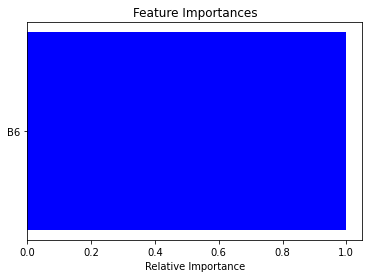

In [240]:
X = df[features]

# Create Random Forest Classifier Model
rfc_model = RandomForestClassifier(random_state=1)

# Build the model
rfc_model.fit(X, y)

features = X.columns
importances = rfc_model.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [241]:
# Conduct mapping for Feature Names
featureName_mapping = {
    "A1_1" : "Vitamin B12 (pmol/L)",
    "A1_2" : "Serum Folate (nmol/L)",
    "A2_1" : "Serum Homocysteine (µmol/L)",
    "A3_1" : "25-hydroxy Vitamin D (nmol/L)",
    "B1_a" : "Haemoglobin (g/L)",
    "B1_a1" : "RBC (/L)",
    "B1_a2" : "PCV (L/L)",
    "B1_a3" : "MCV (fL)",
    "B1_a4" : "MCH (pg)",
    "B1_a5" : "MCHC (g/L)",
    "B1_a6" : "RDW (%)",
    "B1_b" : "White Cell Count (/L)",
    "B1_b1" : "Neutrophils (/L)",
    "B1_b2" : "Lymphocytes (/L)",
    "B1_b3" : "Monocytes (/L)",
    "B1_b4" : "Eosinophils (/L)",
    "B1_b5" : "Basophils (/L)",
    "B1_c" : "Platelets (/L)",
    "B1_d" : "Glucose (mmol/L)",
    "B2_a1" : "Total Cholesterol (mmol/L)",
    "B2_a2" : "Triglyceride (mmol/L)",
    "B2_a3" : "HDL Cholesterol (mmol/L)",
    "B2_a4" : "LDL Cholesterol (mmol/L)",
    "B2_a5" : "Total Cholesterol/HDL Ratio",
    "B2_b1" : "Sodium (mmol/L)",
    "B2_b2" : "Potassium (mmol/L)",
    "B2_b3" : "Chloride (mmol/L)",
    "B2_c1" : 'Urea (mmol/L)',
    "B2_c2" : "Creatinine (umol/L)",
    "B2_c3" : "eGFR (mL/min/1.73m2)",
    "B2_c4" : "Uric Acid (mmol/L)",
    "B2_c5" : "Calcium (mmol/L)",
    "B2_c6" : "Corrected Calcium (mmol/L)",
    "B2_c7" : "Phosphate (mmol/L)",
    "B2_d1" : "Total Protein (g/L)",
    "B2_d2" : "Albumin (g/L)",
    "B2_d3" : "Globulin (g/L)",
    "B2_d4" : "Albumin/Globulin ratio",
    "B2_d5" : "Alkaline Phosphatase (U/L)",
    "B2_d6" : "Total Bilirubin (µmol/L)",
    "B2_d7" : "GGT",
    "B2_d8" : "AST",
    "B2_d9" : "ALT",
    "B3" : "C-Reactive Protein",
    "B4_a1" : "Protein",
    "B4_a2" : "pH",
    "B4_a3" : "Glucose",
    "B4_a4" : "Ketones",
    "B4_a5" : "S.G.",
    "B4_a6" : "Blood",
    "B4_b1" : "Leucocytes (/L)",
    "B4_b2" : "Erythrocytes (/L)",
    "B4_b3" : "Epithelial Cells",
    "B5_a1" : "Free Thyroxine (FT4) (pmol/L)",
    "B5_a2" : "Thyroid Stimulating Hormone (mIU/L)",
    "B5_a3" : "Free Tri-iodothyronine (FT3) (pmol/L)",
    "B6" : "HbA1c"
}

df_dummy = pd.Series(features)
df_dummy = df_dummy.map(featureName_mapping)

listing = []

for items in indices:
    listing.append(items)
    
listing.reverse()
newfeatures = []

for i in listing:
    print(features[i], "-->", df_dummy[i])
    newfeatures.append(features[i])

X = df[newfeatures]

B6 --> HbA1c


In [242]:
# pca = decomposition.PCA(n_components=3)
# pca.fit(X)
# X = pca.transform(X)

# X = pd.DataFrame(X)

# # Create Random Forest Classifier Model
# rfc_model = RandomForestClassifier(random_state=1)

# # Build the model
# rfc_model.fit(X, y)

# features = X.columns
# importances = rfc_model.feature_importances_
# indices = np.argsort(importances)[-9:]  # top 10 features

# plt.title('Feature Importances')
# plt.barh(range(len(indices)), importances[indices], color='b', align='center')
# plt.yticks(range(len(indices)), [features[i] for i in indices])
# plt.xlabel('Relative Importance')
# plt.show()

In [243]:
# X = StandardScaler().fit_transform(X)
X = MinMaxScaler().fit_transform(X)

In [244]:
# Summarise the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 343, 1: 83})


In [245]:
# Undersample the majority class
# Define undersample strategy

# 75% of majority class
# sampling_strategy = {0: 254, 1: 231, 2: 221, 3: 133, 4: 76, 5: 7}

# 50% of majority class
# sampling_strategy = {0: 170, 1: 170, 2: 170, 3: 133, 4: 76, 5: 7}

# 25% of majority class
# sampling_strategy = {0: 85, 1: 85, 2: 85, 3: 85, 4: 76, 5: 7}

# sampling_strategy = {'robust': 223, 'prefrail_mci': 223, 'prefrail': 223, 'mci': 133, 'frail_mci': 76}
# sampling_strategy = {0: 254, 1: 233, 2: 223, 3: 133, 4: 76, 5: 7}
# undersample = RandomUnderSampler(sampling_strategy=sampling_strategy)

sampling_strategy = {0: 83, 1: 83}
undersample = RandomUnderSampler(sampling_strategy=sampling_strategy)

# 50% of majority class
# undersample = RandomUnderSampler(sampling_strategy=0.0413)

# 25% of majority class
# undersample = RandomUnderSampler(sampling_strategy=0.0826)

X, y = undersample.fit_resample(X, y)

# Summarise the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 83, 1: 83})


In [246]:
# # Transform the dataset using SMOTE
# oversample = SMOTE()
# X, y = oversample.fit_resample(X, y)

# # Summarise the new class distribution
# counter = Counter(y)
# print(counter)

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 1)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
print("Logistic Regression:", log_model.score(X_test, y_test).round(3))

# Linear Discriminant Analysis
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)
print("Linear Discriminant Analysis:", lda_model.score(X_test, y_test).round(3))

# K-Nearest Neigbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
print("K-Nearest Neigbors:", knn_model.score(X_test, y_test).round(3))

# Classification and Regression Tree
cart_model = DecisionTreeClassifier()
cart_model.fit(X_train, y_train)
print("Classification and Regression Tree:", cart_model.score(X_test, y_test).round(3))

# Gaussian Naive Bayes
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
print("Gaussian Naive Bayes:", gnb_model.score(X_test, y_test).round(3))

# Support Vector Machines
svm_model = SVC(gamma='auto')
svm_model.fit(X_train, y_train)
print("Support Vector Machines:", svm_model.score(X_test, y_test).round(3))

# Random Forest Classifier
rfc_model = RandomForestClassifier(random_state=1)
rfc_model.fit(X_train, y_train)
print("Random Forest Classifier:", rfc_model.score(X_test, y_test).round(3))

Logistic Regression: 0.507
Linear Discriminant Analysis: 0.507
K-Nearest Neigbors: 0.507
Classification and Regression Tree: 0.507
Gaussian Naive Bayes: 0.507
Support Vector Machines: 0.478
Random Forest Classifier: 0.507


In [248]:
# Calculating for KNN
knn_pred = knn_model.predict(X_test)

print('Performance Metrics for KNN:\n')
print(accuracy_score(y_test, knn_pred).round(5), '\n')
print(confusion_matrix(y_test, knn_pred), '\n')
print(classification_report(y_test, knn_pred))

# Calculating for RFC
rfc_pred = rfc_model.predict(X_test)

print('Performance Metrics for RFC:\n')
print(accuracy_score(y_test, rfc_pred).round(5), '\n')
print(confusion_matrix(y_test, rfc_pred), '\n')
print(classification_report(y_test, rfc_pred))

Performance Metrics for KNN:

0.50746 

[[19 16]
 [17 15]] 

              precision    recall  f1-score   support

           0       0.53      0.54      0.54        35
           1       0.48      0.47      0.48        32

    accuracy                           0.51        67
   macro avg       0.51      0.51      0.51        67
weighted avg       0.51      0.51      0.51        67

Performance Metrics for RFC:

0.50746 

[[19 16]
 [17 15]] 

              precision    recall  f1-score   support

           0       0.53      0.54      0.54        35
           1       0.48      0.47      0.48        32

    accuracy                           0.51        67
   macro avg       0.51      0.51      0.51        67
weighted avg       0.51      0.51      0.51        67



In [249]:
# K-Nearest Neigbors

knn_model = KNeighborsClassifier()
knn_model.fit(X, y)
scores = cross_val_score(knn_model, X, y, cv=5)
print("K-Nearest Neighbors: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

# Random Forest Classifier

rfc_model = RandomForestClassifier()
rfc_model.fit(X, y)
scores = cross_val_score(rfc_model, X, y, cv=5)
print("Random Forest Classifier: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

K-Nearest Neighbors: 0.48 accuracy with a standard deviation of 0.04
Random Forest Classifier: 0.48 accuracy with a standard deviation of 0.04
